This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

from Functions_ImportData import import_filtered_NOAA_obs
from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month
from Functions_Indicators import select_station
from Functions_ImportData import import_gorongosa_obs_pr

from Graphs_functions import cdf_plot_category_or_obs
from Graphs_functions import boxplots_
from Graphs_functions import compare_3_lines

# Import data

## Observations data

### Precipitation and temperature NOAA

In [2]:
daily_sum_obs_from_NOAA = import_filtered_NOAA_obs()

In [3]:
daily_sum_obs_from_NOAA['TMAX']

0         29.0
1         27.0
2          NaN
3          NaN
4          NaN
          ... 
137721     NaN
137722     NaN
137723     NaN
137724     NaN
137725     NaN
Name: TMAX, Length: 137726, dtype: float64

In [4]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'NAME','BEIRA, MZ')

In [5]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'NAME','PEMBA, MZ')

In [6]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'NAME','CHIMOIO, MZ')

In [7]:
daily_sum_obs_from_NOAA_CHIMOIO

STATION         NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
2689   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-01   
2690   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-02   
2691   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-03   
2692   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-04   
2693   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-05   
...            ...          ...       ...        ...        ...         ...   
14159  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-27   
14160  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-28   
14161  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-29   
14162  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-30   
14163  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-31   

       PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMAX_ATTRIBUTES  TMIN  \
2689    0.4             ,,Q   NaN             NaN  ...              ,,Q  20.7   
2690    0.0             ,,Q   NaN             NaN  ...              ,,Q  21.2   
2691    0.0             ,,Q   NaN             NaN  ...              ,,Q  20.5   
2692    0.0             ,,Q   NaN             NaN  ...              ,,Q  19.2   
2693    0.0             ,,Q   NaN             NaN  ...              ,,Q  20.2   
...     ...             ...   ...             ...  ...              ...   ...   
14159   NaN             NaN  24.9            H,,S  ...              NaN  21.8   
14160   NaN             NaN  25.9            H,,S  ...              ,,S  20.0   
14161  23.1             ,,S  24.3            H,,S  ...              ,,S  20.9   
14162  45.0             ,,S  22.9            H,,S  ...              ,,S  21.0   
14163  33.0             ,,S  21.6            H,,S  ...              NaN  20.4   

       TMIN_ATTRIBUTES  Year  Month Season PRCP MISSING  TAVG MISSING  \
2689               ,,Q  1970    Jan  Humid            0             1   
2690               ,,Q  1970    Jan  Humid            0             1   
2691               ,,Q  1970    Jan  Humid            0             1   
2692               ,,Q  1970    Jan  Humid            0             1   
2693               ,,Q  1970    Jan  Humid            0             1   
...                ...   ...    ...    ...          ...           ...   
14159              ,,S  2014    Dec  Humid            1             0   
14160              ,,S  2014    Dec  Humid            1             0   
14161              ,,S  2014    Dec  Humid            0             0   
14162              ,,S  2014    Dec  Humid            0             0   
14163              ,,S  2014    Dec  Humid            0             0   

       TMAX MISSING  TMIN MISSING  
2689              0             0  
2690              0             0  
2691              0             0  
2692              0             0  
2693              0             0  
...             ...           ...  
14159             1             0  
14160             0             0  
14161             0             0  
14162             0             0  
14163             1             0  

[11475 rows x 21 columns]

### Precipitation from Gorongosa 

In [8]:
pr_obs_gorongosa_from_gorongosa=import_gorongosa_obs_pr()

In [9]:
pr_obs_gorongosa_from_gorongosa

time     pr  Year Month Season  pr MISSING
0      1980-01-01    NaN  1980   Jan  Humid           1
1      1980-01-02    NaN  1980   Jan  Humid           1
2      1980-01-03    NaN  1980   Jan  Humid           1
3      1980-01-04    NaN  1980   Jan  Humid           1
4      1980-01-05    NaN  1980   Jan  Humid           1
...           ...    ...   ...   ...    ...         ...
14971  2020-12-27    2.7  2020   Dec  Humid           0
14972  2020-12-28    0.0  2020   Dec  Humid           0
14973  2020-12-29    0.0  2020   Dec  Humid           0
14974  2020-12-30  138.4  2020   Dec  Humid           0
14975  2020-12-31   80.4  2020   Dec  Humid           0

[14976 rows x 6 columns]

## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [10]:
# to compare historic modelisation with NOAA observation data
path_model_pr_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_pr_past)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [11]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past

Name station  Experiment       Model  Latitude  Longitude        Date  \
493080    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  01-01-1970   
493081    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  02-01-1970   
493082    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  03-01-1970   
493083    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  04-01-1970   
493084    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  05-01-1970   
...             ...         ...         ...       ...        ...         ...   
739615    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  27-12-2014   
739616    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  28-12-2014   
739617    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  29-12-2014   
739618    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  30-12-2014   
739619    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  31-12-2014   

        Mean of the daily precipitation rate mm/day  Year Month Season  
493080                                    15.221261  1970   Jan  Humid  
493081                                    15.258603  1970   Jan  Humid  
493082                                     3.232764  1970   Jan  Humid  
493083                                     0.340715  1970   Jan  Humid  
493084                                     2.544045  1970   Jan  Humid  
...                                             ...   ...   ...    ...  
739615                                     3.778890  2014   Dec  Humid  
739616                                     5.969581  2014   Dec  Humid  
739617                                     3.112424  2014   Dec  Humid  
739618                                     0.000000  2014   Dec  Humid  
739619                                     9.957744  2014   Dec  Humid  

[246540 rows x 10 columns]

In [12]:
# pas convaincue que le ligne suivante soit tres utile

In [13]:
# to compare projections with NOAA observation data
path_past_proj = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Pemba = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Pemba_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Chimoio = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Chimoio_WTP_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Mutua = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='WTP_Mutua_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Gorongosa_EIB']

### Temperature NEX-GDDP-CMIP6

In [14]:
# to compare with NOAA observation data
path_model_tas_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1970-2014_projectsMoz.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_tas_past)
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1970,2014)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

### Maximum temperature NEX-GDDP-CMIP6

In [15]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1970-2014_projectsMoz.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [16]:
# to compare projections with NOAA observation data
path_past_proj_tasmax = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1950-2100.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj_tasmax)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_CHIMOIO = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_BEIRA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='BEIRA, MZ']

### Minimum temperature NEX GDDP CMIP6

In [17]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmin\tasmin_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmin_1970-2014_projectsMoz.csv'
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

In [18]:
# beira

In [19]:
daily_sum_obs_from_NOAA_BEIRA

STATION       NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
123007  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-01   
123008  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-02   
123009  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-03   
123010  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-04   
123011  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-05   
...             ...        ...       ...        ...        ...         ...   
137721  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-27   
137722  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-28   
137723  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-29   
137724  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-30   
137725  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-31   

        PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMAX_ATTRIBUTES  \
123007   0.0             ,,Q   NaN             NaN  ...              ,,Q   
123008   0.0             ,,Q   NaN             NaN  ...              ,,Q   
123009   0.0             ,,Q   NaN             NaN  ...              ,,Q   
123010   2.5             ,,Q   NaN             NaN  ...              ,,Q   
123011  10.3             ,,Q   NaN             NaN  ...              ,,Q   
...      ...             ...   ...             ...  ...              ...   
137721   NaN             NaN  30.8            H,,S  ...              NaN   
137722   NaN             NaN  30.0            H,,S  ...              NaN   
137723   NaN             NaN  28.0            H,,S  ...              NaN   
137724   NaN             NaN  25.6            H,,S  ...              NaN   
137725   4.1             ,,S  27.2            H,,S  ...              NaN   

        TMIN  TMIN_ATTRIBUTES  Year  Month Season PRCP MISSING  TAVG MISSING  \
123007  23.8              ,,Q  1970    Jan  Humid            0             1   
123008  25.2              ,,Q  1970    Jan  Humid            0             1   
123009  26.2              ,,Q  1970    Jan  Humid            0             1   
123010  25.0              ,,Q  1970    Jan  Humid            0             1   
123011  24.6              ,,Q  1970    Jan  Humid            0             1   
...      ...              ...   ...    ...    ...          ...           ...   
137721   NaN              NaN  2014    Dec  Humid            1             0   
137722   NaN              NaN  2014    Dec  Humid            1             0   
137723   NaN              NaN  2014    Dec  Humid            1             0   
137724   NaN              NaN  2014    Dec  Humid            1             0   
137725  23.6              ,,S  2014    Dec  Humid            0             0   

        TMAX MISSING  TMIN MISSING  
123007             0             0  
123008             0             0  
123009             0             0  
123010             0             0  
123011             0             0  
...              ...           ...  
137721             1             1  
137722             1             1  
137723             1             1  
137724             1             1  
137725             1             0  

[14719 rows x 21 columns]

In [20]:
df_obs_Beira=daily_sum_obs_from_NOAA_BEIRA#[daily_sum_obs_from_NOAA_BEIRA['Year'].between(1974,2014)]

missing data


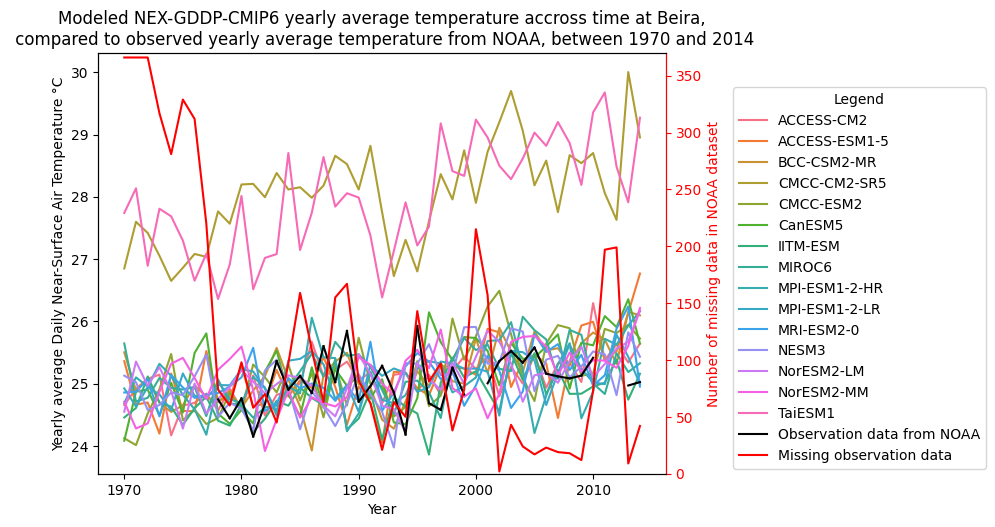

In [21]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Beira,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

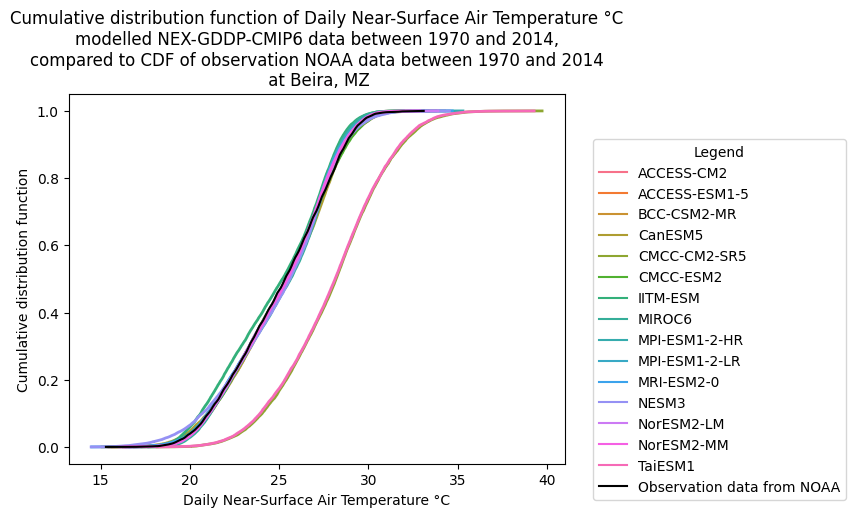

In [22]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Beira,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


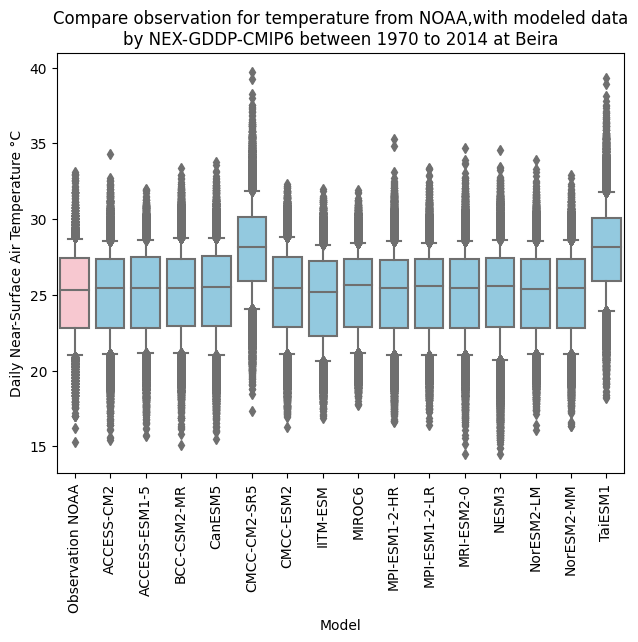

In [23]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',df_obs_Beira,'TAVG','Beira')

In [24]:
# pemba

missing data


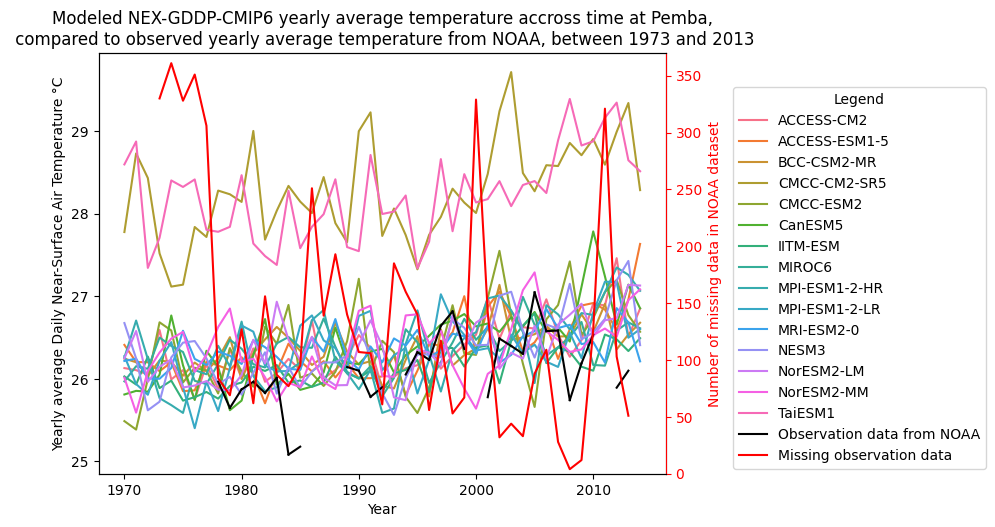

In [25]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

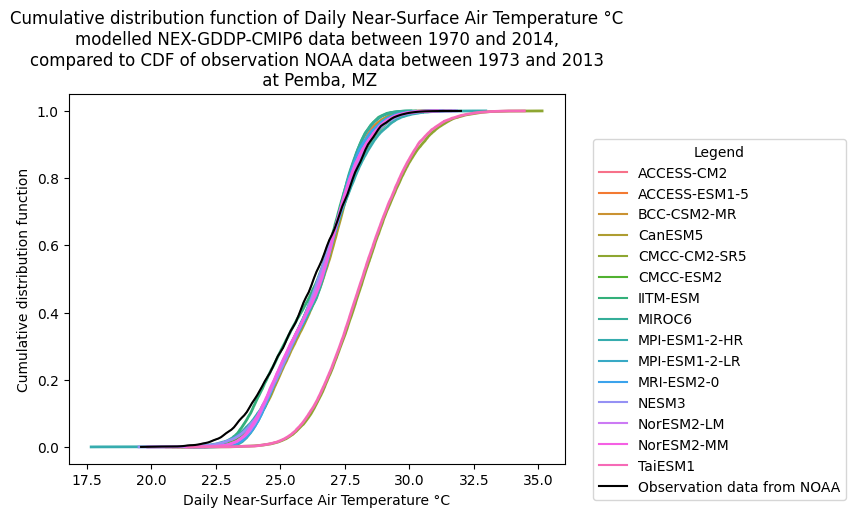

In [26]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


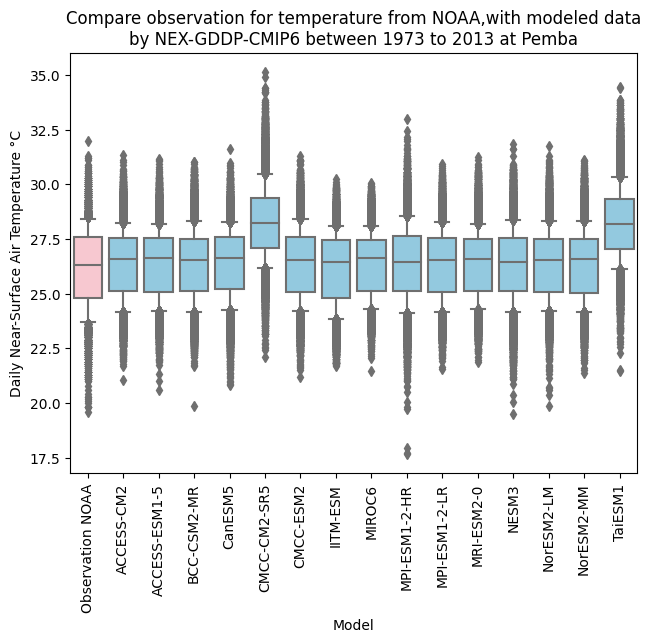

In [27]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [28]:
# Chimoio

In [29]:
df_obs_Chimoio=daily_sum_obs_from_NOAA_CHIMOIO#[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1974,2014)]

missing data


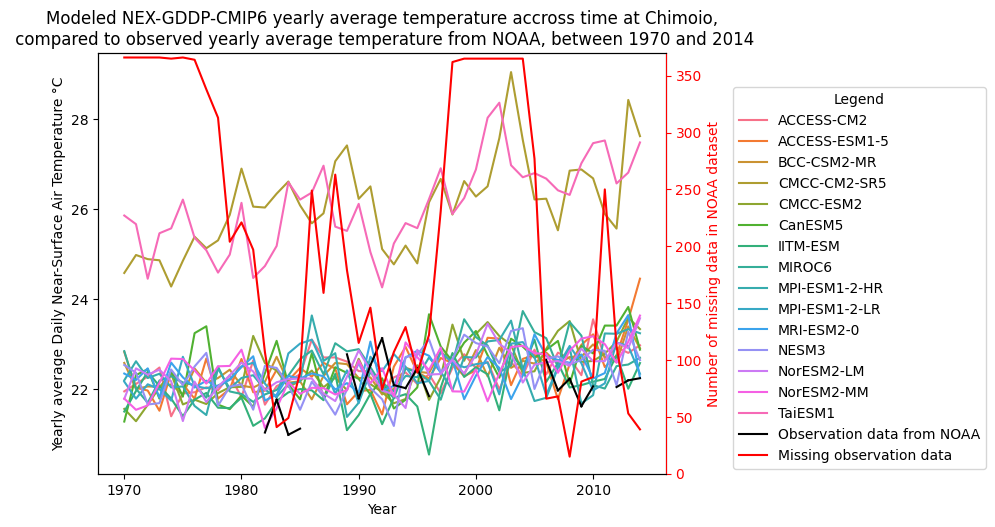

In [30]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Chimoio,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

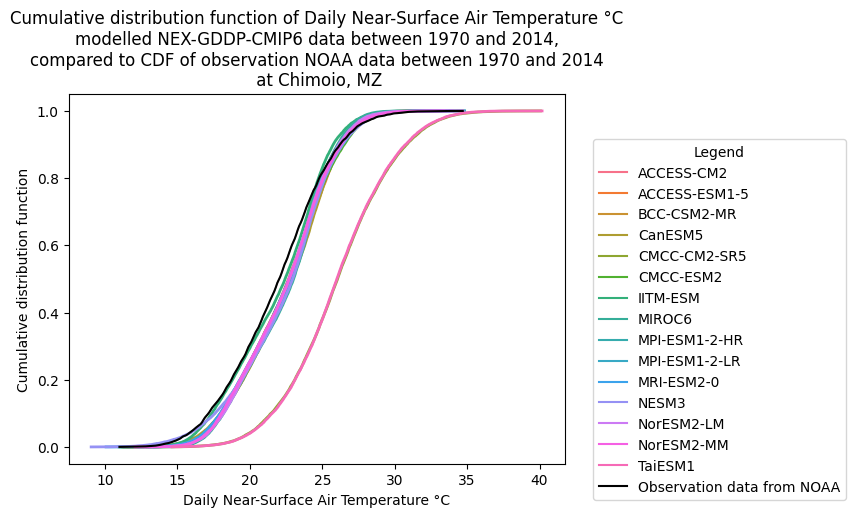

In [31]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Chimoio,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


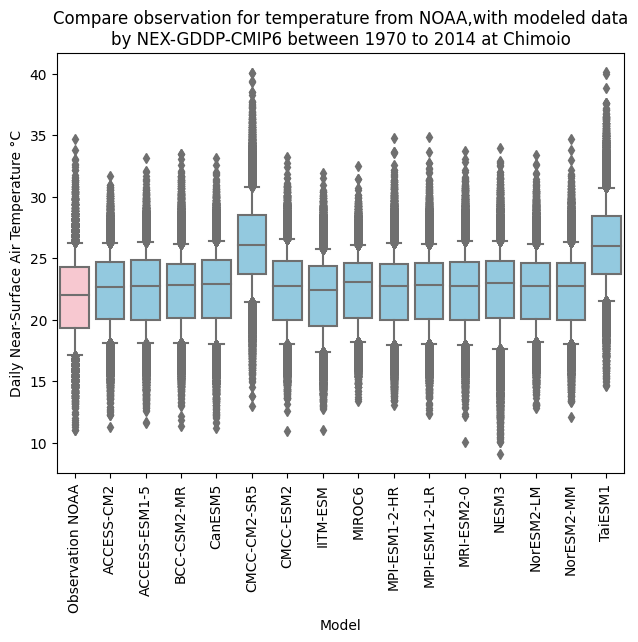

In [32]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',df_obs_Chimoio,'TAVG','Chimoio')

## Maximum temperature

In [33]:
# beira

missing data


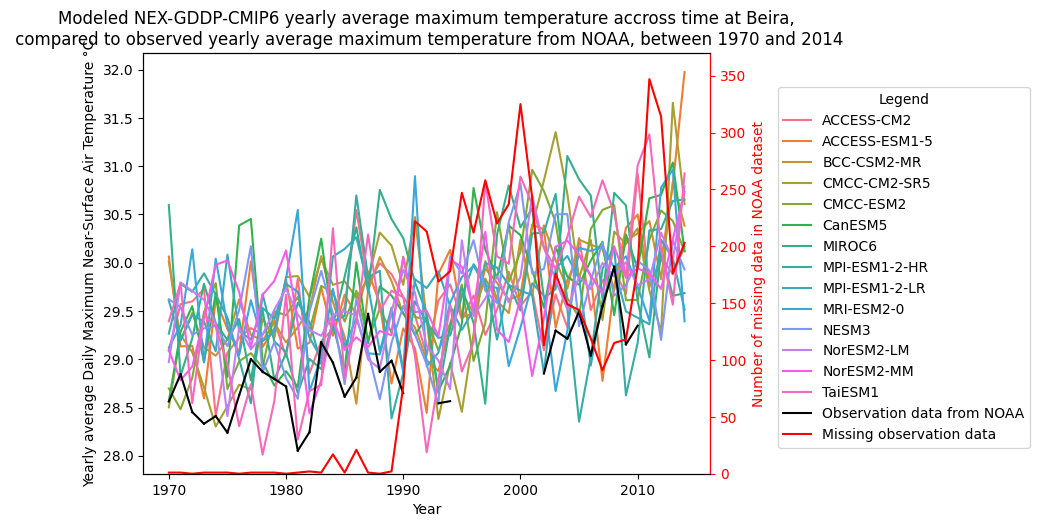

In [34]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

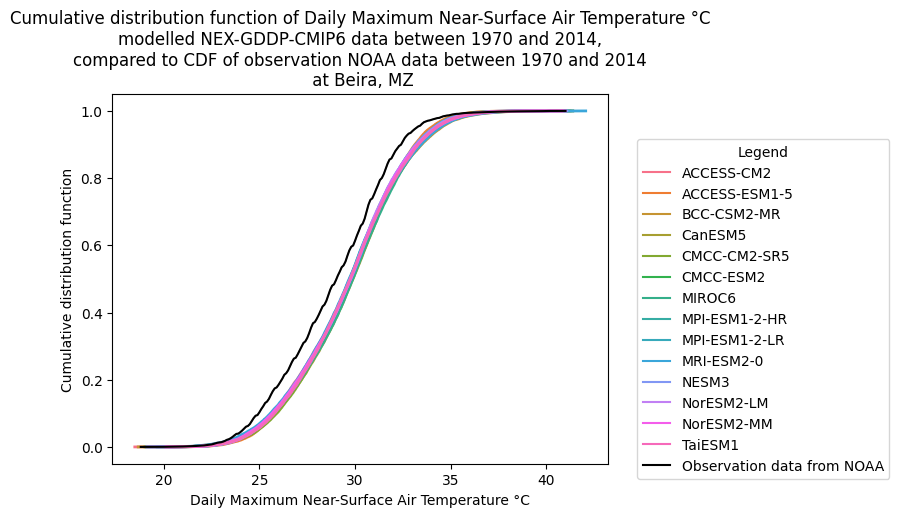

In [35]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


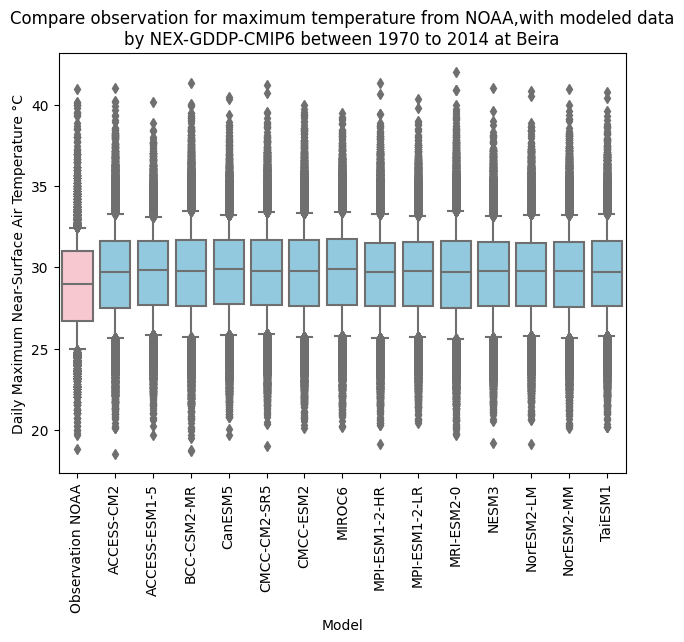

In [36]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

In [37]:
# pemba

missing data


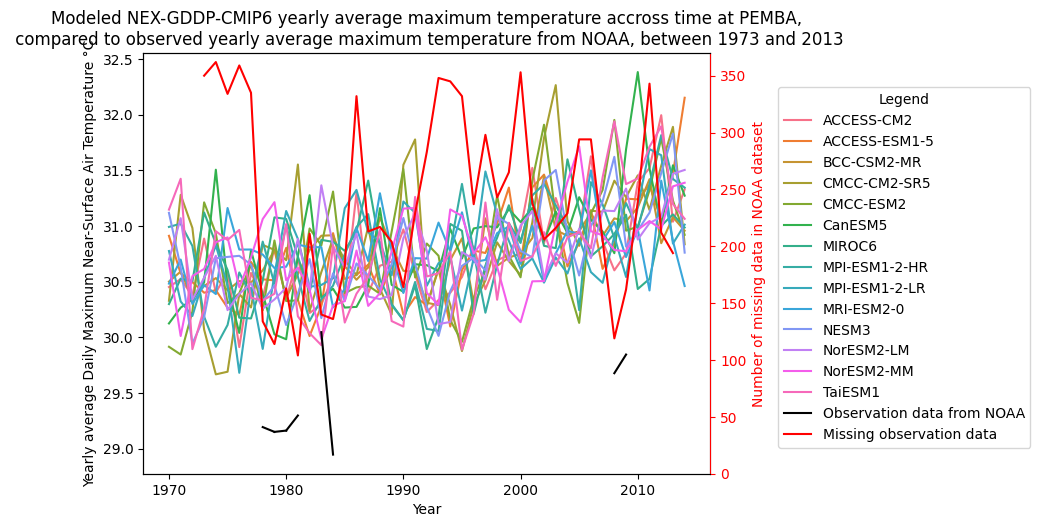

In [38]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean maximum daily temperature °C','PEMBA')

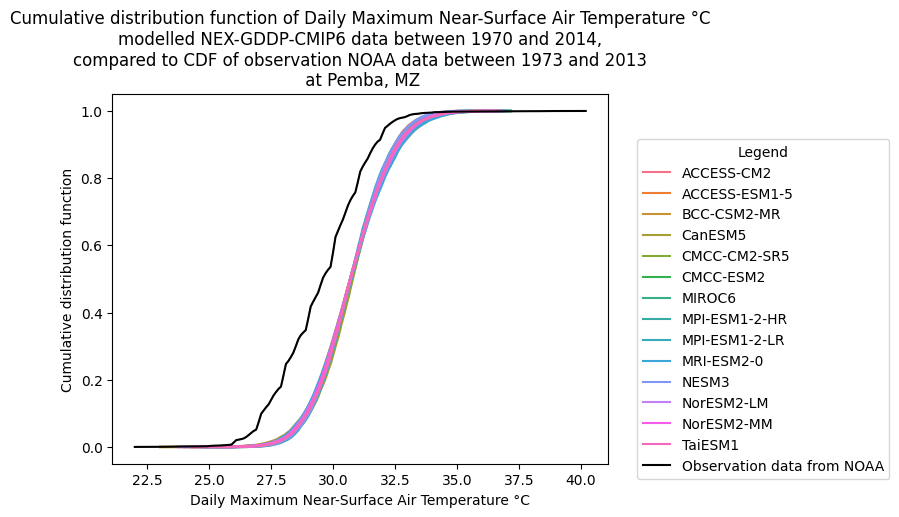

In [39]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


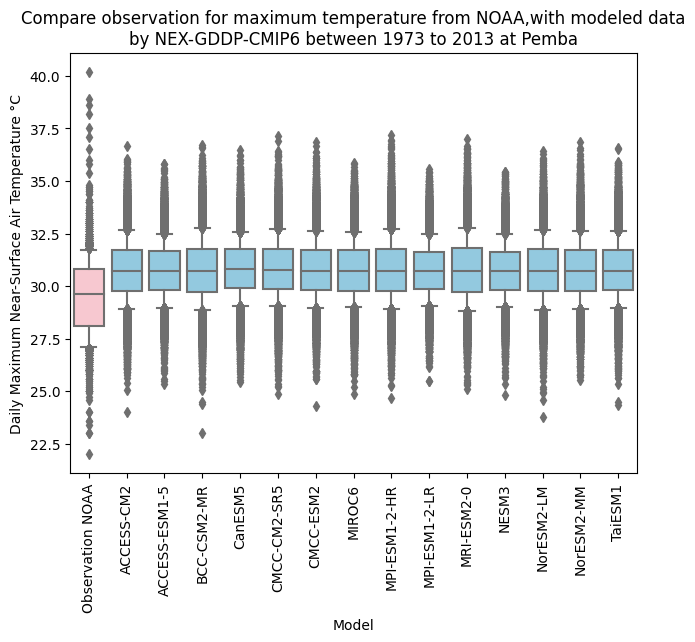

In [40]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

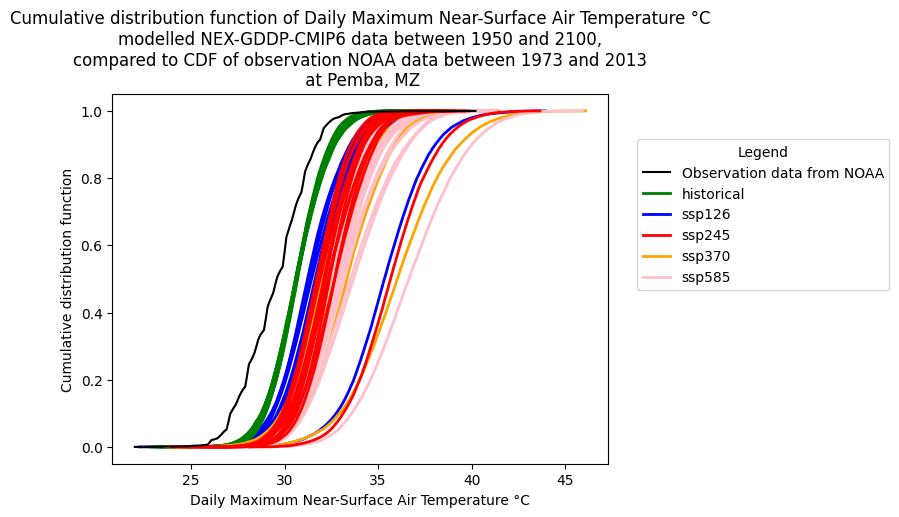

In [41]:
df = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA[['Experiment','Year','Model','Daily Maximum Near-Surface Air Temperature °C']]#.groupby(['Experiment','Year'])[['Daily Maximum Near-Surface Air Temperature °C']].mean().reset_index()
cdf_plot_category_or_obs('Pemba, MZ',df_initial=df,name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Experiment',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [42]:
# chimoio

missing data


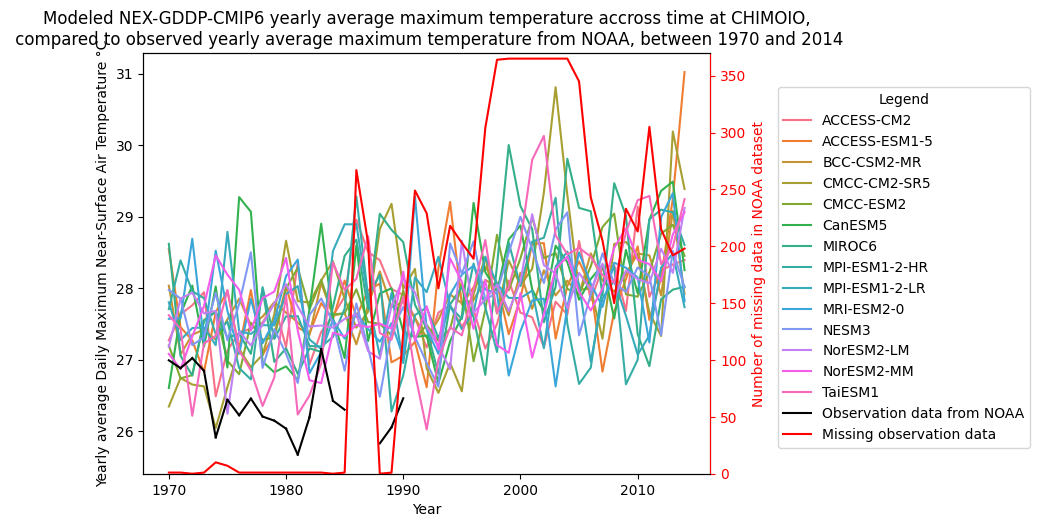

In [43]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

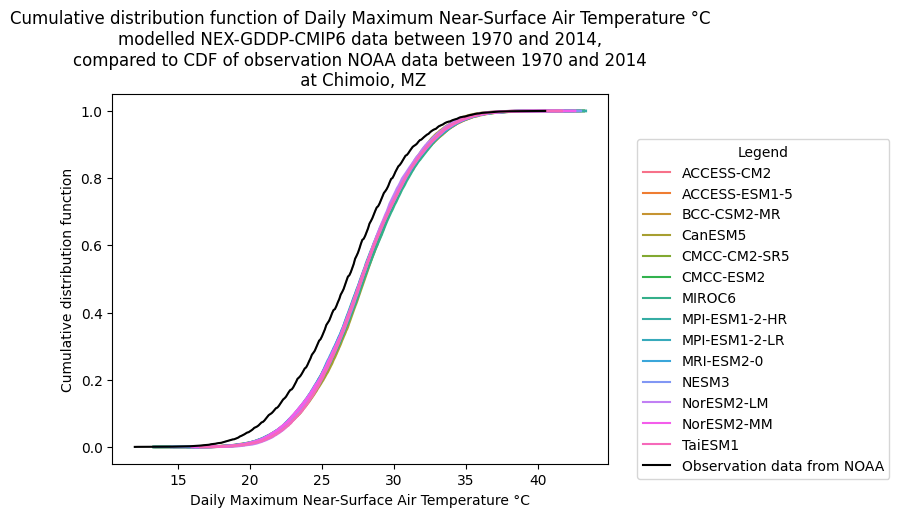

In [44]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


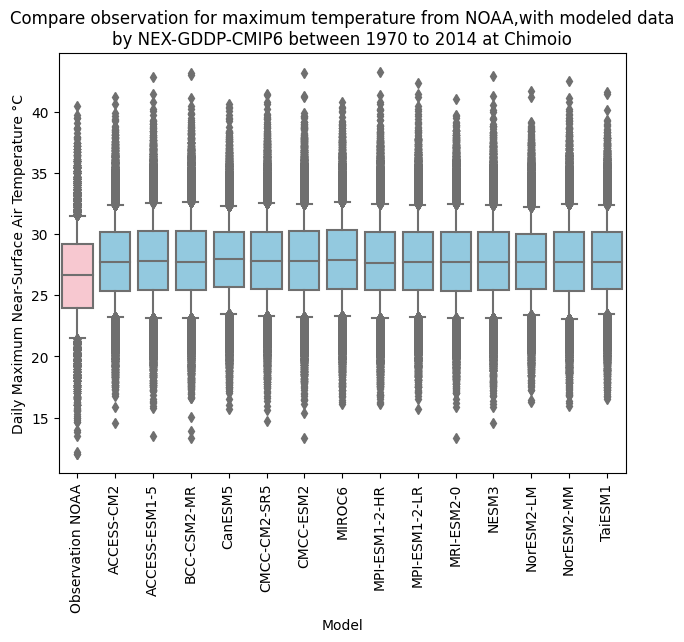

In [45]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

## Minimum temperature

In [46]:
# Beira

missing data


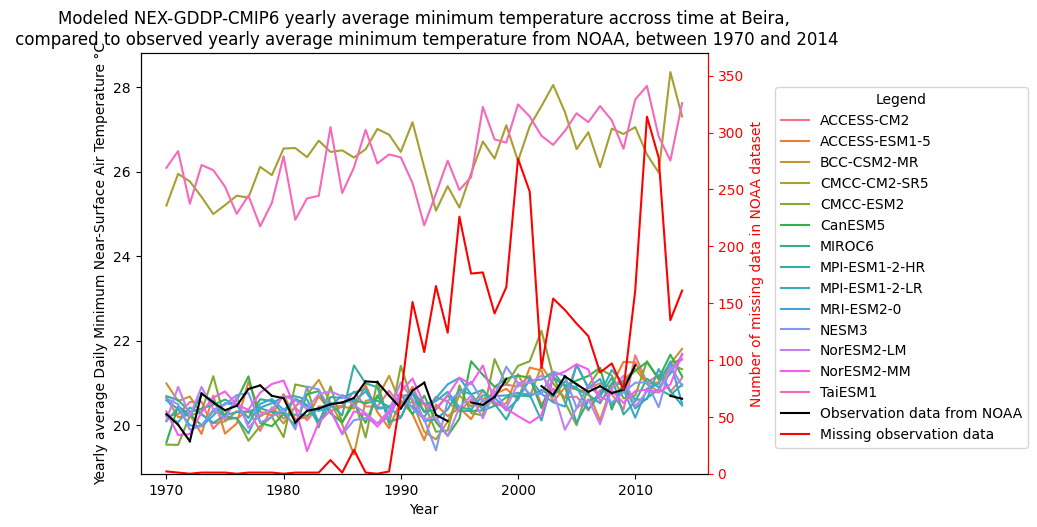

In [47]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Beira')

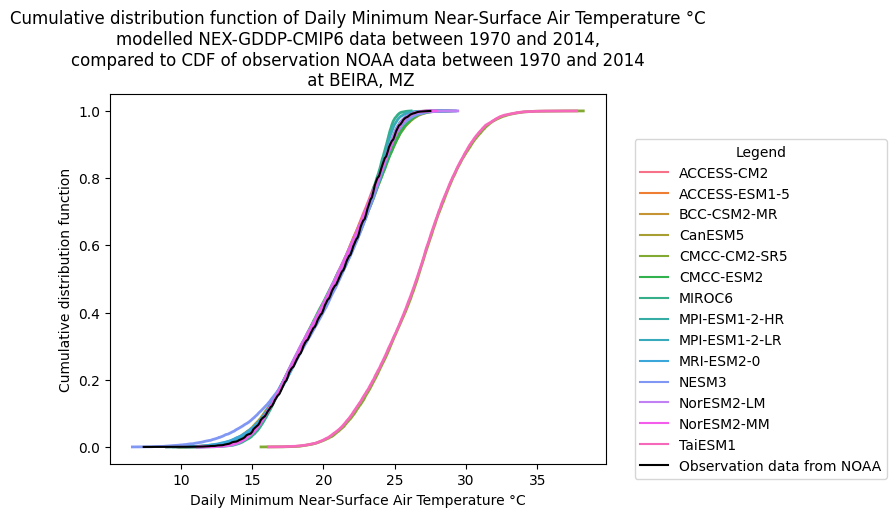

In [48]:
cdf_plot_category_or_obs('BEIRA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMIN',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


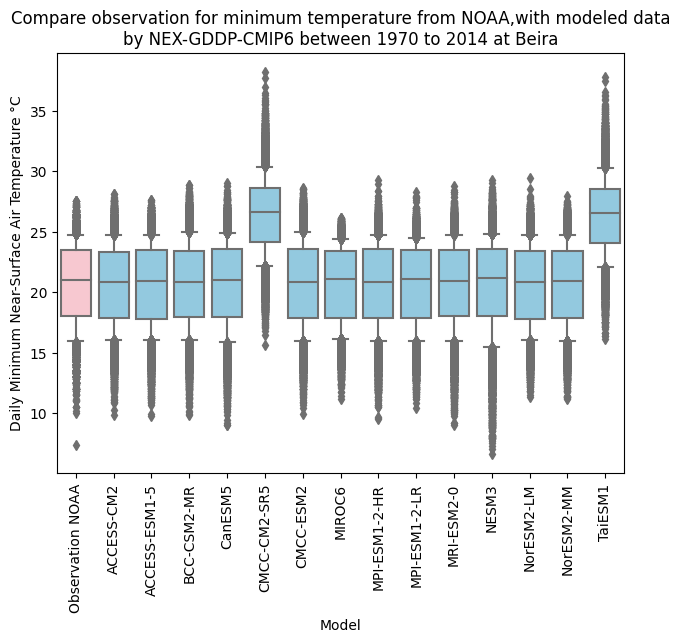

In [49]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','Beira')

In [50]:
# pemba

missing data


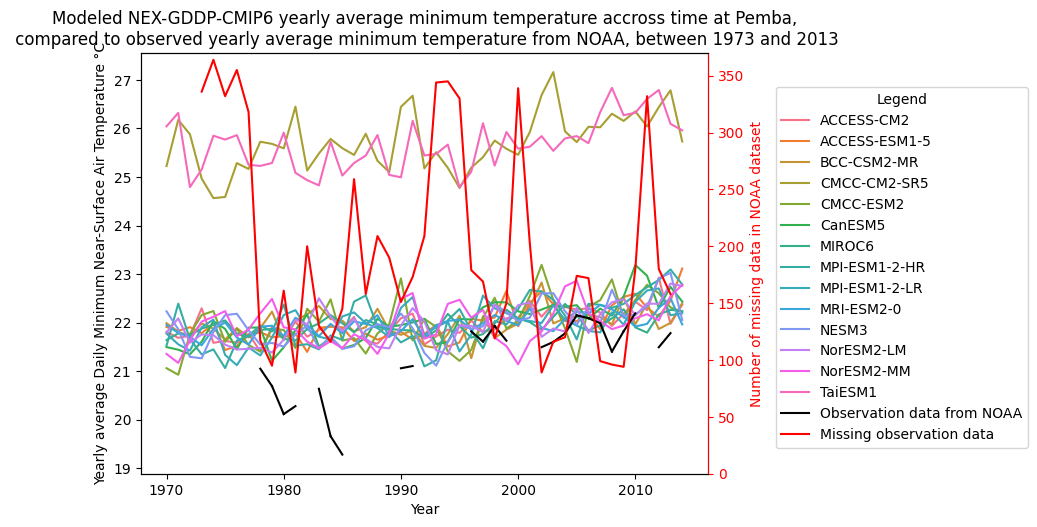

In [51]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Pemba')

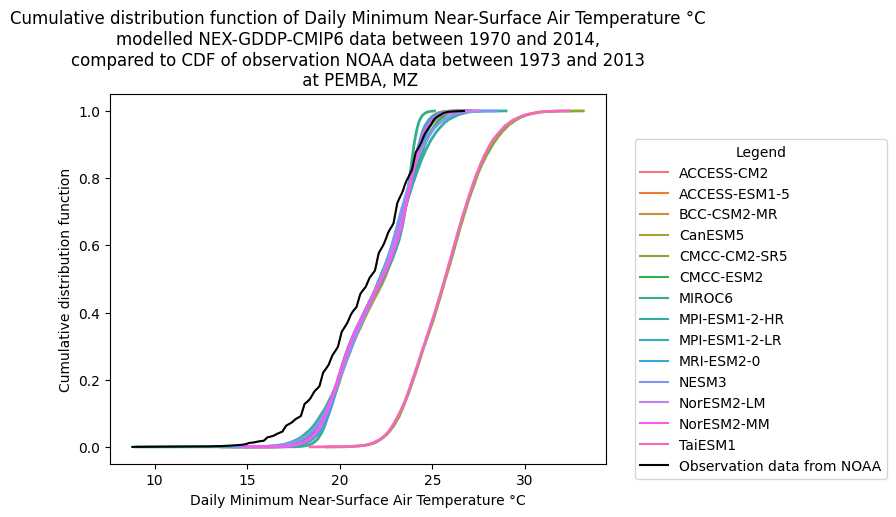

In [52]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMIN',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


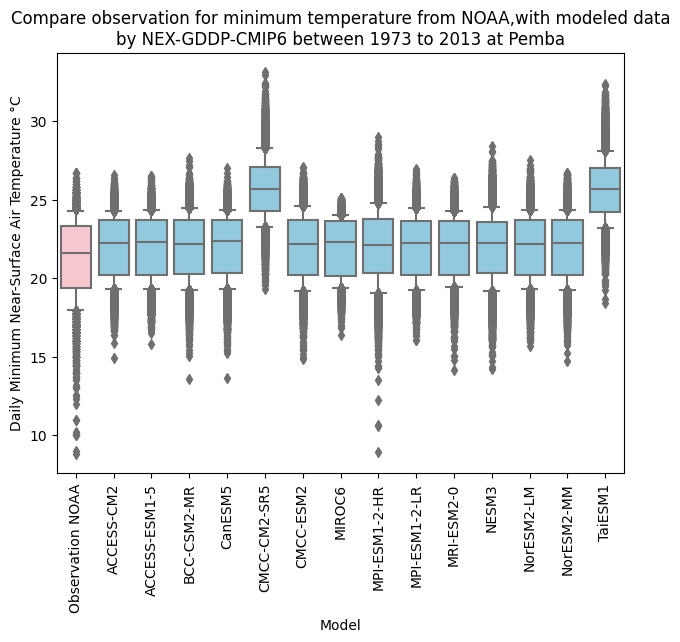

In [53]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMIN','Pemba')

In [54]:
# Chimoio

missing data


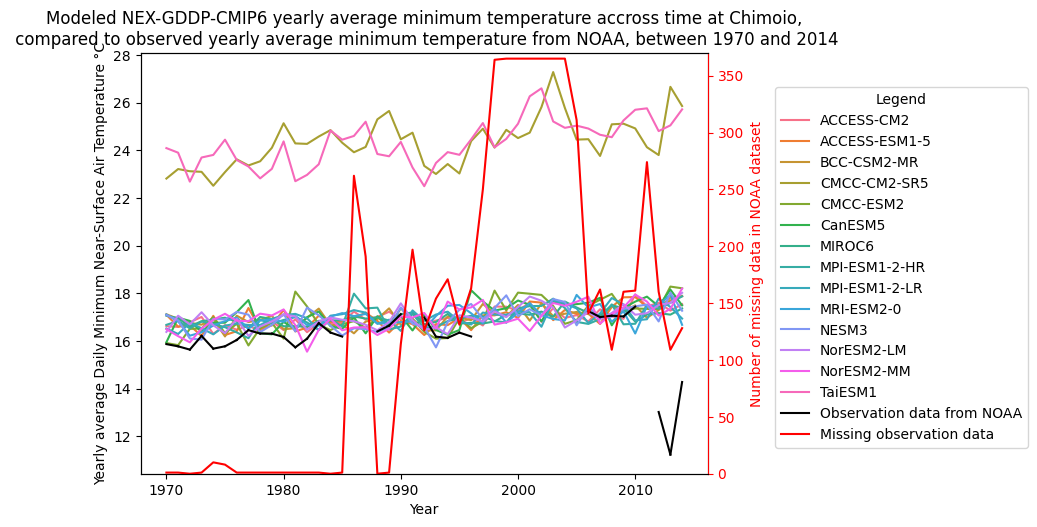

In [55]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','NOAA','Annual mean daily minimum temperature °C','Chimoio')

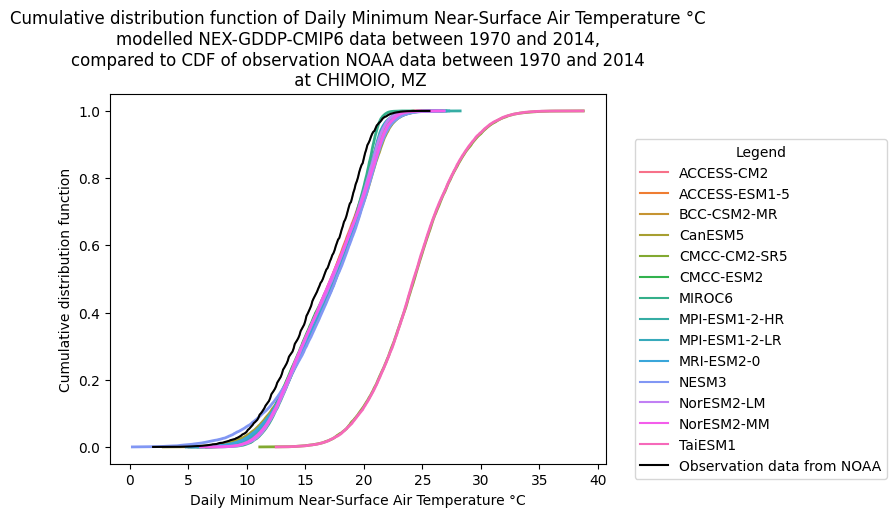

In [56]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMIN',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


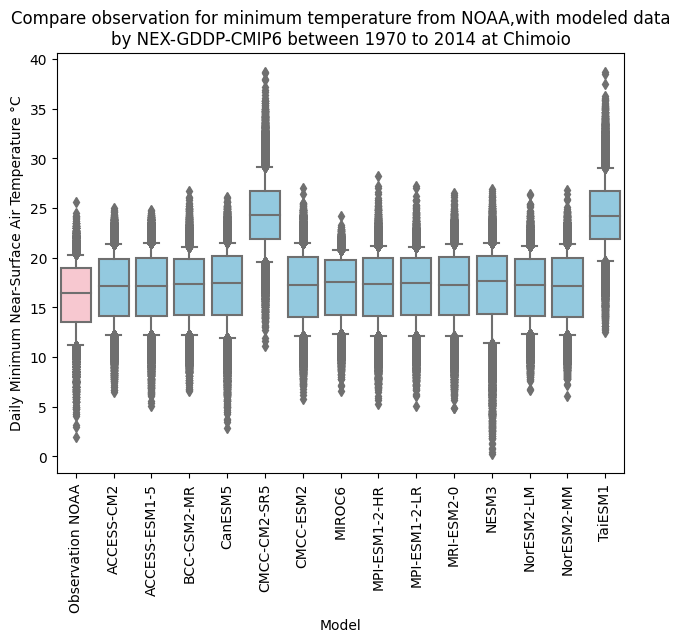

In [57]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','Chimoio')

## Precipitation

In [58]:
# Beira

missing data


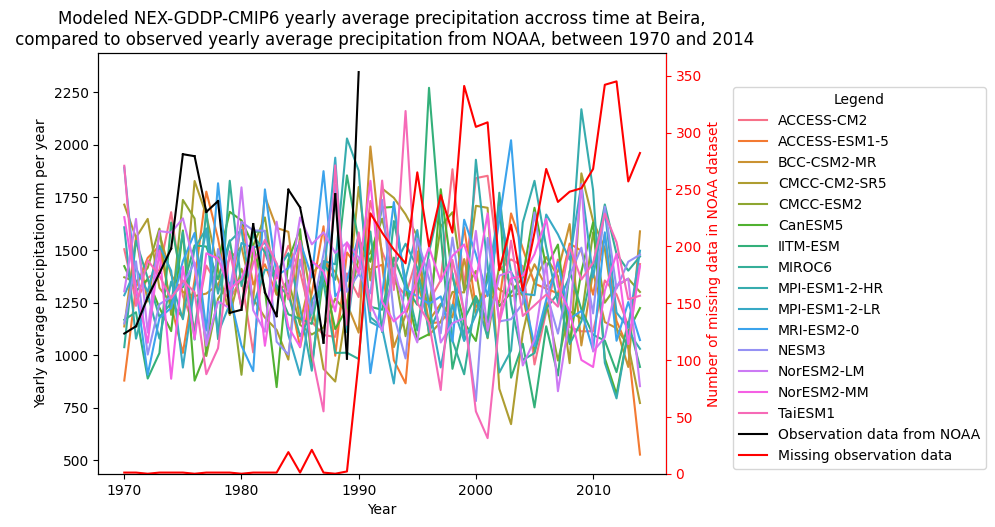

In [59]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

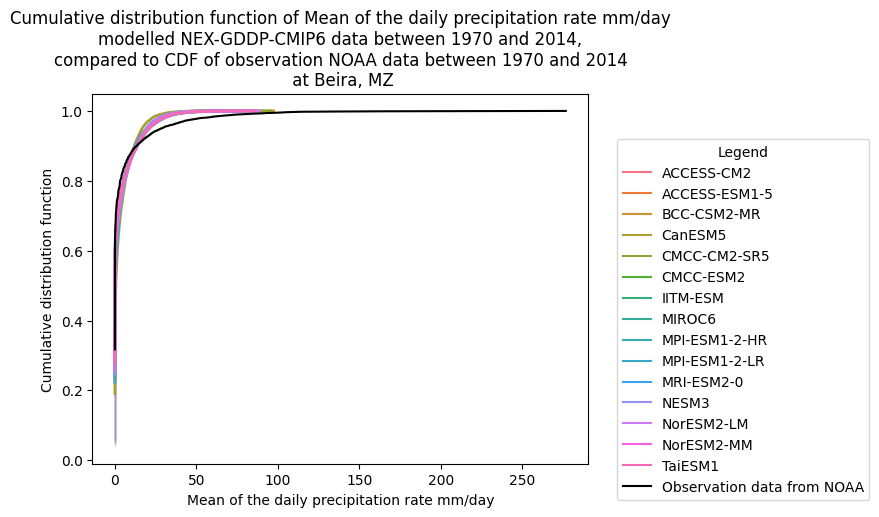

In [60]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='PRCP',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


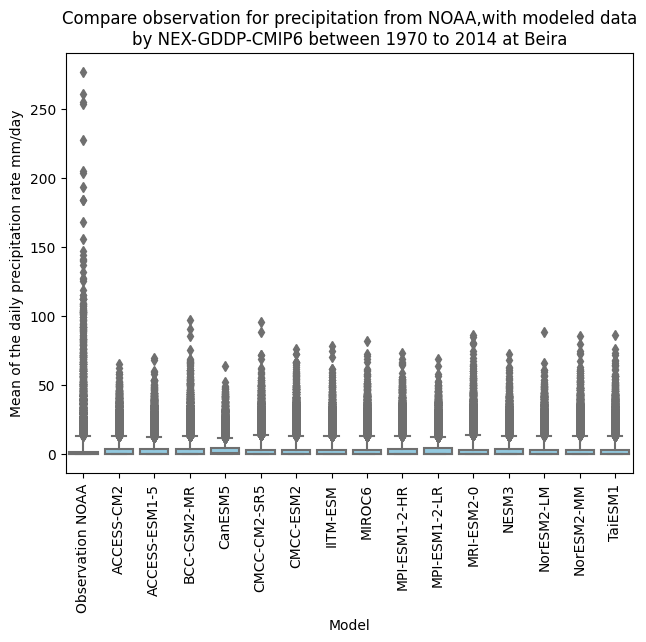

In [61]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

In [62]:
# pemba

missing data


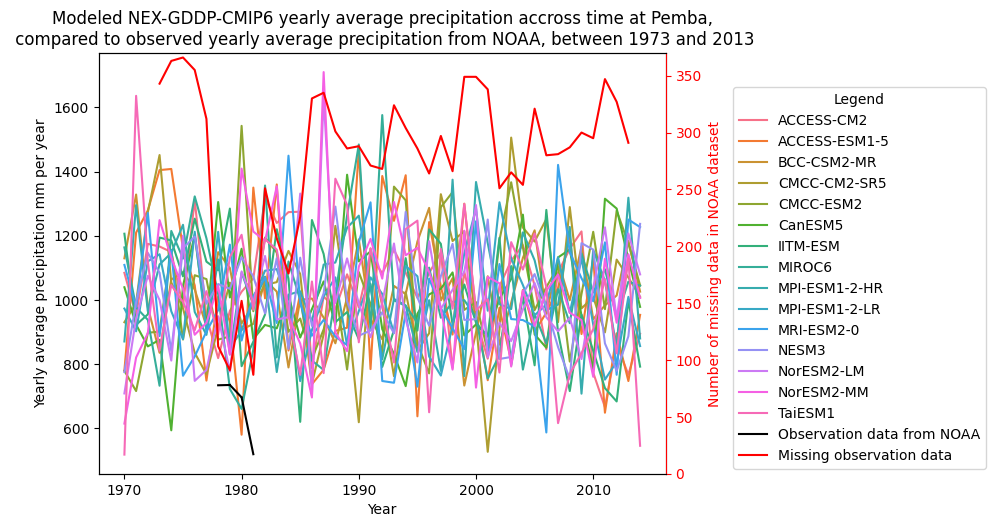

In [63]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Pemba')

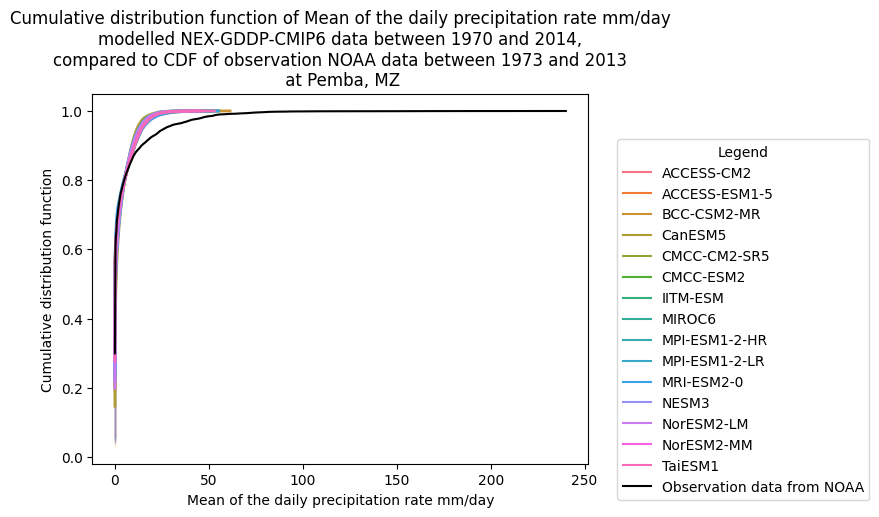

In [64]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='PRCP',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


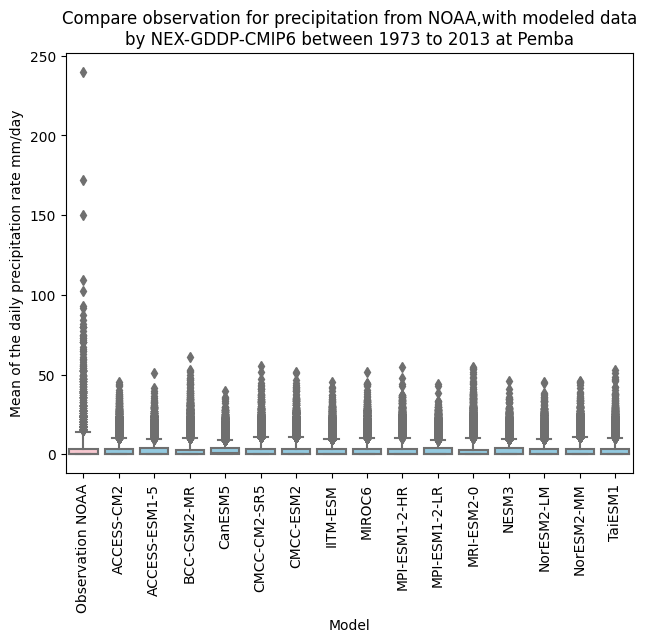

In [65]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','Pemba')

In [66]:
# Chimoio

missing data


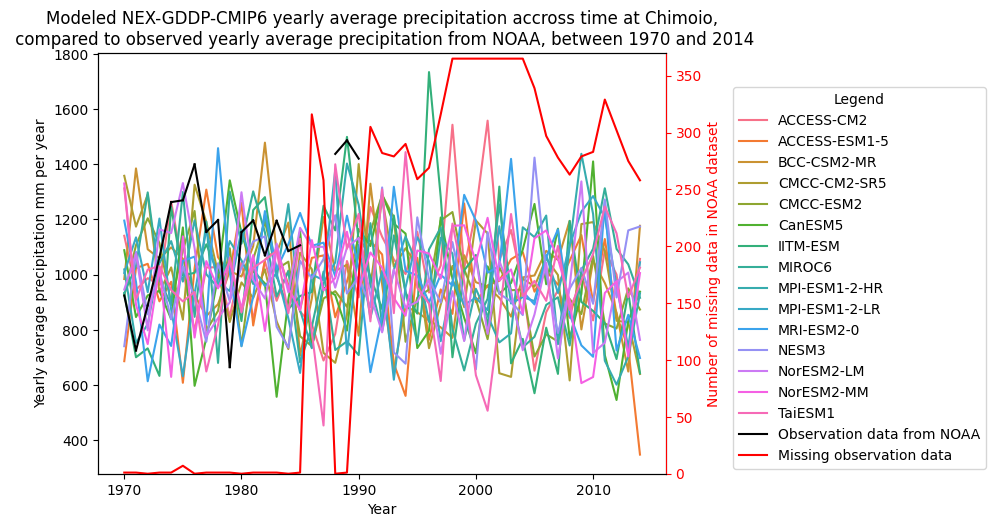

In [67]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

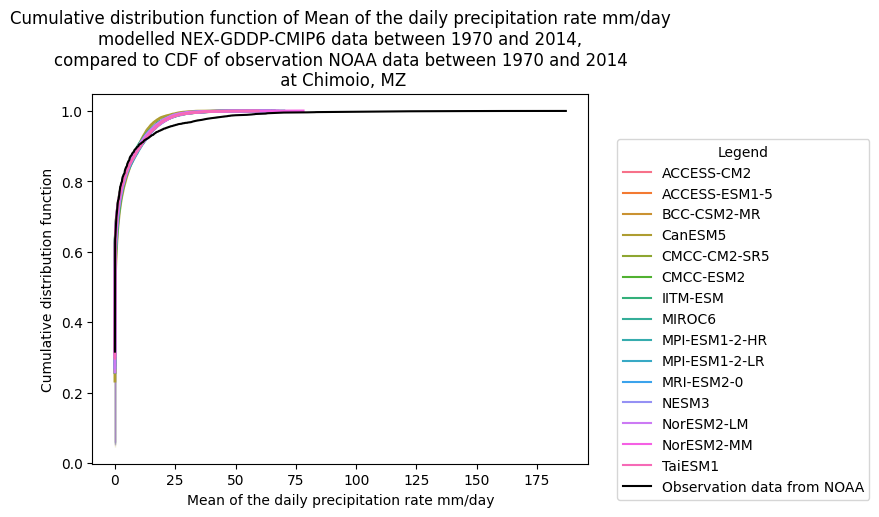

In [68]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


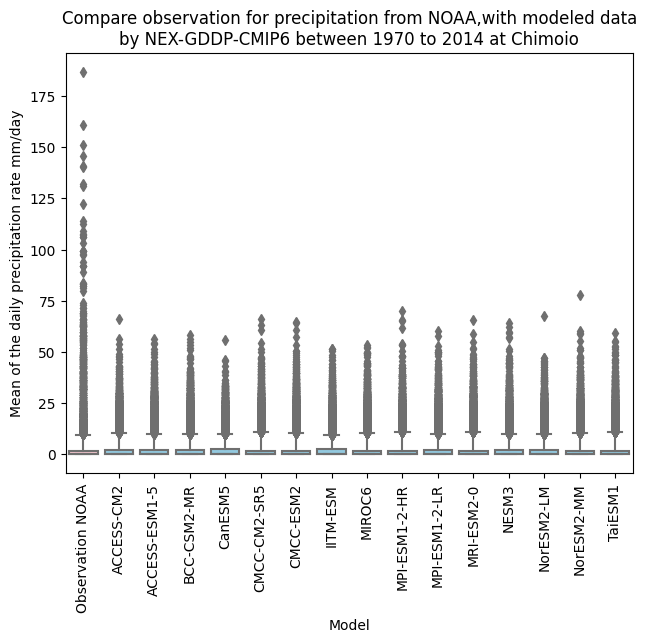

In [69]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [70]:
# gorongosa (close to chimoio)

In [71]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare =pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa['Year'].between(1980,2014)]

In [72]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare

Name project  Experiment       Model  Latitude  Longitude  \
2251732  Gorongosa_EIB  historical  ACCESS-CM2   -18.625     34.125   
2251733  Gorongosa_EIB  historical  ACCESS-CM2   -18.625     34.125   
2251734  Gorongosa_EIB  historical  ACCESS-CM2   -18.625     34.125   
2251735  Gorongosa_EIB  historical  ACCESS-CM2   -18.625     34.125   
2251736  Gorongosa_EIB  historical  ACCESS-CM2   -18.625     34.125   
...                ...         ...         ...       ...        ...   
2596885  Gorongosa_EIB  historical     TaiESM1   -18.625     34.125   
2596886  Gorongosa_EIB  historical     TaiESM1   -18.625     34.125   
2596887  Gorongosa_EIB  historical     TaiESM1   -18.625     34.125   
2596888  Gorongosa_EIB  historical     TaiESM1   -18.625     34.125   
2596889  Gorongosa_EIB  historical     TaiESM1   -18.625     34.125   

               Date  Mean of the daily precipitation rate mm_per_day  Year  \
2251732  01-01-1980                                         0.000000  1980   
2251733  02-01-1980                                         4.110794  1980   
2251734  03-01-1980                                         2.507440  1980   
2251735  04-01-1980                                         0.000000  1980   
2251736  05-01-1980                                         0.487962  1980   
...             ...                                              ...   ...   
2596885  27-12-2014                                        15.047861  2014   
2596886  28-12-2014                                        21.683533  2014   
2596887  29-12-2014                                         8.551384  2014   
2596888  30-12-2014                                         2.862741  2014   
2596889  31-12-2014                                         0.645512  2014   

        Month Season  
2251732   Jan  Humid  
2251733   Jan  Humid  
2251734   Jan  Humid  
2251735   Jan  Humid  
2251736   Jan  Humid  
...       ...    ...  
2596885   Dec  Humid  
2596886   Dec  Humid  
2596887   Dec  Humid  
2596888   Dec  Humid  
2596889   Dec  Humid  

[191760 rows x 10 columns]

In [73]:
pr_obs_gorongosa_from_gorongosa_to_comp = pr_obs_gorongosa_from_gorongosa[pr_obs_gorongosa_from_gorongosa['Year'].between(1980,2014)]

missing data


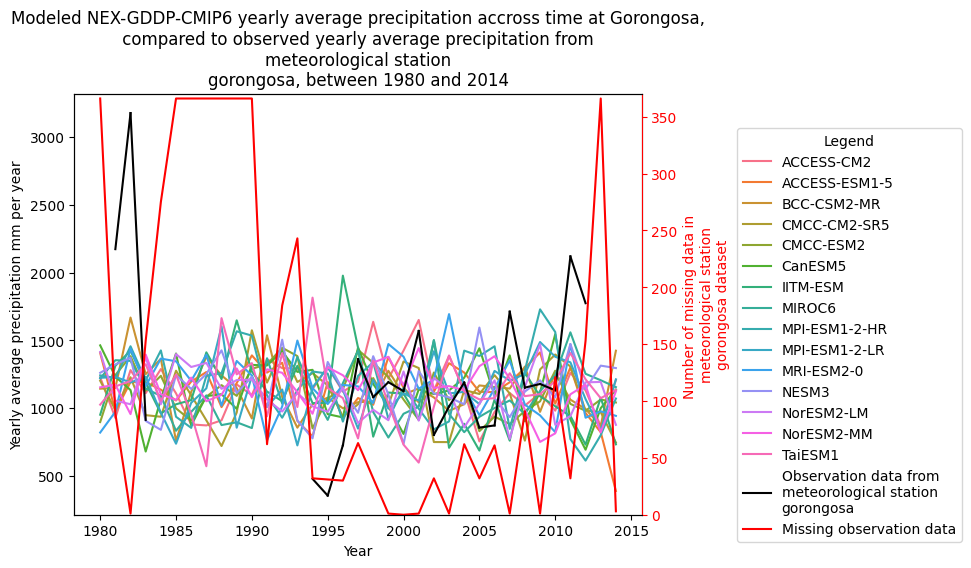

In [74]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day','NEX-GDDP-CMIP6',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','\nmeteorological station\ngorongosa','Yearly mean of the mean daily precipitation rate mm/day','Gorongosa')

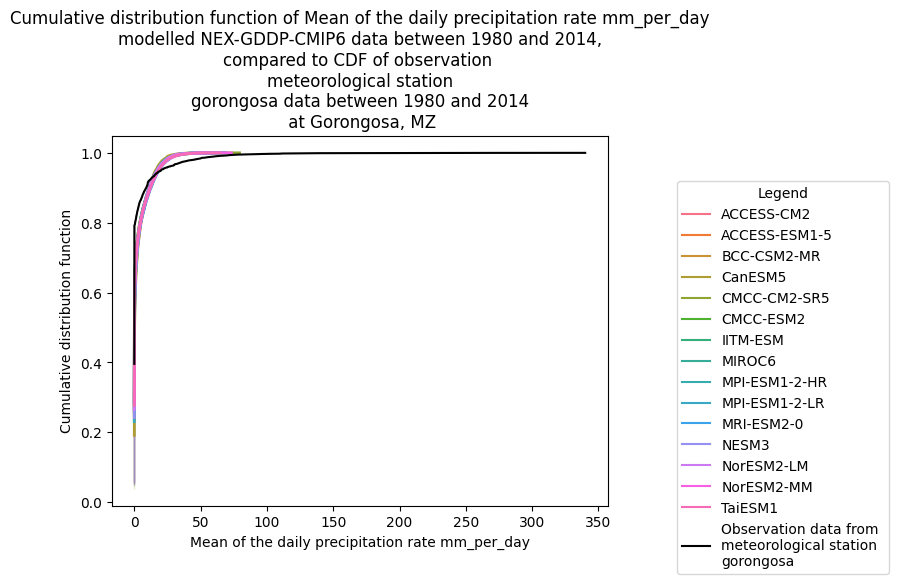

In [75]:
cdf_plot_category_or_obs('Gorongosa, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare[['Model','Year','Mean of the daily precipitation rate mm_per_day']],name_column_df='Mean of the daily precipitation rate mm_per_day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=pr_obs_gorongosa_from_gorongosa_to_comp,name_column_obs='pr',source_obs='\nmeteorological station\ngorongosa')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


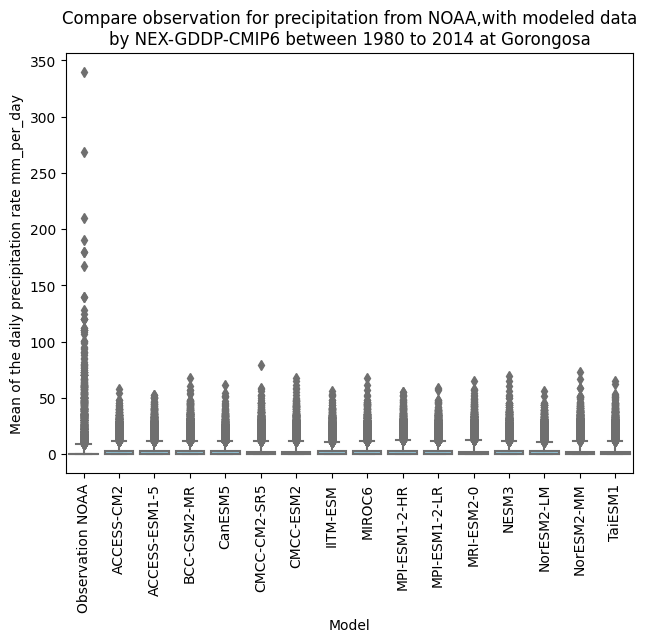

In [76]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','Gorongosa')

# What needs to be changed ?
## Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature and minimum temeprature, 'TAIESM1' and 'CMCC-CM2-SR5' are not following the trend. Take out those 2 models for all climate variable

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for average temperature
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for minimum temperature
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

## Temperature : take out some models

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

## Maximum temperature : take out some models (the ones that were not performing well for average temperature) from modelled data and some extreme values that are not plausible from observation data

In [ ]:
# take out models 
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# chimoio

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean daily maximum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')